In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
# pip install konlpy

In [3]:
df = pd.read_csv('./appstore_634598719.csv')

In [4]:
df['REVIEW'].head()

0                          안드로이드로는 잘 썼는데 아이폰에서 안되네요 ㅜㅜ
1    다이어트에 심리가 적용되는게 어떤건지 알게되고있어요 의지박약인데 정말 꾸준히 식단기...
2    무료로도 사용할만한 기능들이 있어서 나쁘지 않아요\n지금은 유료 결제로 돌려서 코칭...
3    임신성 당뇨로 대학병원에서 안내받아 사용한지 2주 정도 되었어요. 편리한 부분도 있...
4             업데이트하니까 오류나면서 동작도 안하네요\n하.. 그냥 이쯤에서 바이바이
Name: REVIEW, dtype: object

In [5]:
df[['REVIEW']]

,REVIEW
0,안드로이드로는 잘 썼는데 아이폰에서 안되네요 ㅜㅜ
1,다이어트에 심리가 적용되는게 어떤건지 알게되고있어요 의지박약인데 정말 꾸준히 식단기...
2,무료로도 사용할만한 기능들이 있어서 나쁘지 않아요\n지금은 유료 결제로 돌려서 코칭...
3,임신성 당뇨로 대학병원에서 안내받아 사용한지 2주 정도 되었어요. 편리한 부분도 있...
4,업데이트하니까 오류나면서 동작도 안하네요\n하.. 그냥 이쯤에서 바이바이
...,...
495,실행이되지않습니다....하얀화면에 주황동그라미만돌뿐......
496,"드라마틱한 변화는 아니지만, 생활습관이 조금씩 달라집니다. 매일 뭘 먹는지 기록하다..."
497,"운동, 식습관, 마음챙김 등 건강한 습관 만드는데 도움이 되어요^^"
498,꾸준히 식단 기록하고 몸무게 체크하는 것만으로도 살이 빠져요. 코치님도 너무 친절하...


In [6]:
okt = Okt()

df["nouns"] = df["REVIEW"].apply(okt.nouns)

In [7]:
df.head()

,USER,DATE,STAR,LIKE,TITLE,REVIEW,nouns
0,Vincent213,2022-10-27 21:55:04-07:00,2,0,로그인이 안되요 ㅜㅜㅜ,안드로이드로는 잘 썼는데 아이폰에서 안되네요 ㅜㅜ,"[안드로이드, 아이폰]"
1,아오여냐캬캥ㅇ,2022-10-17 03:23:05-07:00,5,0,정말의지박약인 저를 이끄는 앱,다이어트에 심리가 적용되는게 어떤건지 알게되고있어요 의지박약인데 정말 꾸준히 식단기...,"[다이어트, 심리, 적용, 건, 알, 의지, 박약, 정말, 식단, 기록, 체중, 기..."
2,✨Emilia,2022-10-06 22:04:44-07:00,5,0,사용하기 쉬워요,무료로도 사용할만한 기능들이 있어서 나쁘지 않아요\n지금은 유료 결제로 돌려서 코칭...,"[무료, 도, 사용, 기능, 지금, 유료, 결제, 코칭, 체중, 그래프, 화면, 목..."
3,S_jei,2022-10-02 23:08:59-07:00,4,0,피드백이 빨라요.,임신성 당뇨로 대학병원에서 안내받아 사용한지 2주 정도 되었어요. 편리한 부분도 있...,"[임신, 당뇨, 대학병원, 사용, 한지, 주, 정도, 부분, 부분, 매칭, 안, 소..."
4,MinQu,2022-09-21 04:04:01-07:00,1,0,하다하다 업데이트로 날려먹는건 ...,업데이트하니까 오류나면서 동작도 안하네요\n하.. 그냥 이쯤에서 바이바이,"[업데이트, 오류, 면서, 동작, 그냥, 이쯤, 바이바이]"


In [8]:
import itertools

totwords = list(itertools.chain(*df['nouns'].to_list()))

In [9]:
words = [n for n in totwords if len(totwords) > 1] # 단어의 길이가 1개인 것은 제외

In [10]:
c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [16]:
import os
FONT_PATH = os.environ.get("FONT_PATH", "/System/Library/Fonts/AppleSDGothicNeo.ttc")

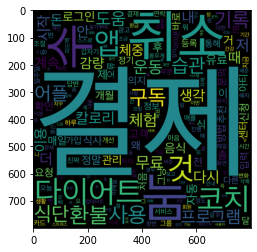

In [17]:
wc = WordCloud(font_path=FONT_PATH, width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [18]:
c

Counter({'안드로이드': 2,
         '아이폰': 24,
         '다이어트': 118,
         '심리': 5,
         '적용': 3,
         '건': 14,
         '알': 17,
         '의지': 32,
         '박약': 7,
         '정말': 39,
         '식단': 91,
         '기록': 91,
         '체중': 48,
         '등': 24,
         '저': 62,
         '또': 19,
         '건강': 13,
         '지식': 4,
         '무료': 67,
         '도': 11,
         '사용': 106,
         '기능': 10,
         '지금': 21,
         '유료': 46,
         '결제': 248,
         '코칭': 16,
         '그래프': 5,
         '화면': 17,
         '목표': 13,
         '공유': 4,
         '버튼': 14,
         '겹': 2,
         '안보': 3,
         '여요': 2,
         '거': 43,
         '개선': 23,
         '임신': 3,
         '당뇨': 2,
         '대학병원': 1,
         '한지': 2,
         '주': 15,
         '정도': 18,
         '부분': 25,
         '매칭': 2,
         '안': 53,
         '소정': 1,
         '코치': 113,
         '고객': 38,
         '센터': 32,
         '피드백': 17,
         '빨': 2,
         '우선': 4,
         '계속': 49,
        